In [2]:
#Using ridge regression to overcome linear regression's shortfalls

Bootstrap estimated coefficients (first few samples):
[[ 12.32335898   8.87473682  40.38660128]
 [ 11.35588335  17.33821939  55.36487712]
 [ 52.26538675   2.49956171  89.09398625]
 [  4.60782343   2.07222286  62.52341746]
 [ 28.68308323   5.05629026  61.04796413]
 [  5.75656814 -13.16639653  61.10078974]
 [ 31.49808038  -3.84326438  44.65905914]
 [ 25.21627952  -7.33364203  88.98058173]
 [ 23.89872229  -7.89227002  59.33524231]
 [ 33.02827196  17.46433     49.87521178]]


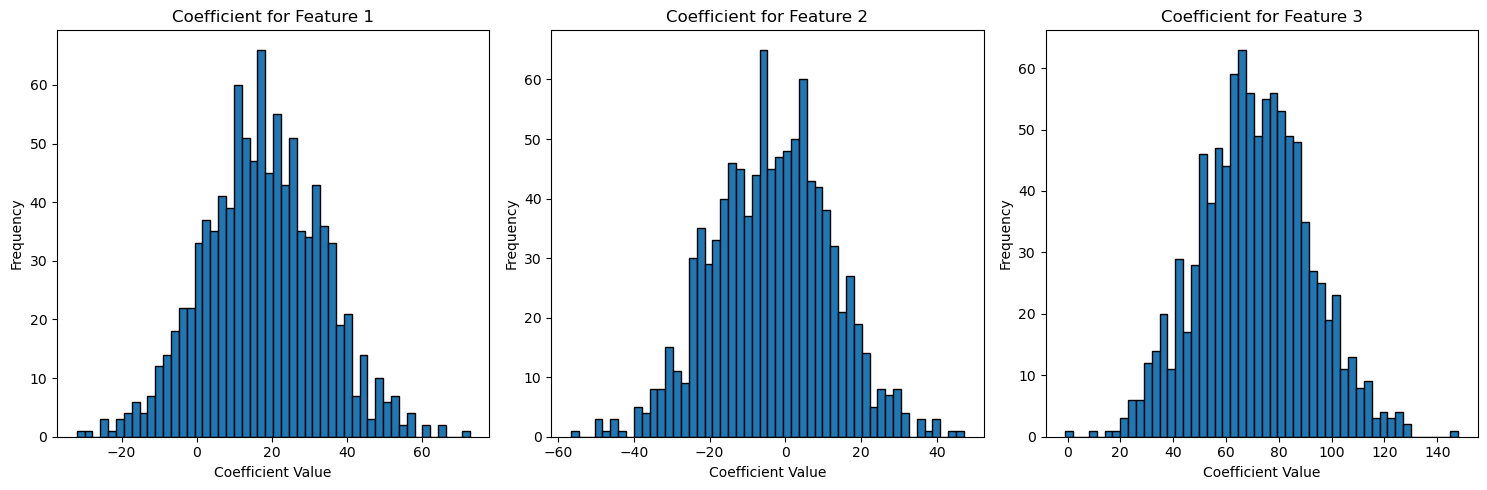

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the California housing data
lr.fit(california.data, california.target)

# Generate synthetic regression data
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

# Bootstrap resampling
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = int(0.5 * len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size, replace=True)

# Pre-allocate space for the coefficients
coefs = np.ones((n_bootstraps, 3))

# Perform bootstrap resampling
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i, :] = lr.coef_

# Display the results
print(f'Bootstrap estimated coefficients (first few samples):\n{coefs[:10, :]}')

# Plot histogram of bootstrap coefficients for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for j in range(3):
    axes[j].hist(coefs[:, j], bins=50, edgecolor='k')
    axes[j].set_title(f'Coefficient for Feature {j+1}')
    axes[j].set_xlabel('Coefficient Value')
    axes[j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


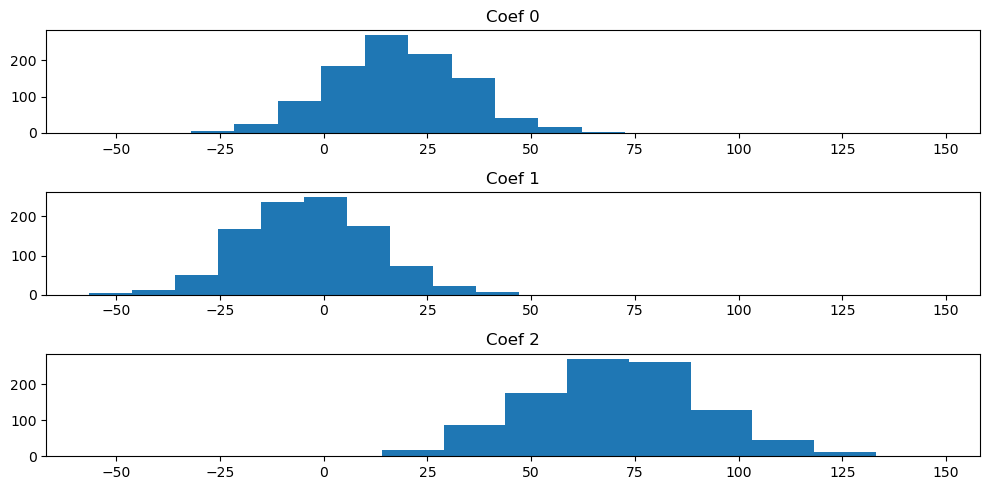

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
 
ax1 = plt.subplot(311, title ='Coef 0')
ax1.hist(coefs[:,0])
 
ax2 = plt.subplot(312,sharex=ax1, title ='Coef 1')
ax2.hist(coefs[:,1])
 
ax3 = plt.subplot(313,sharex=ax1, title ='Coef 2')
ax3.hist(coefs[:,2])
plt.tight_layout()

Bootstrap estimated coefficients (first few samples):
[[27.94160588  6.60243288  8.80458888]
 [34.03607704 -2.84770442 14.07260052]
 [32.8084457   3.98997729 16.93808462]
 [21.44312791  3.58055777 14.06213085]
 [23.06677505  9.78961341 11.86673844]
 [29.64096704  3.05501646  8.95756883]
 [23.57103442 -1.66952696 -2.595888  ]
 [28.85425741  3.58012536 15.35874152]
 [24.36358013 10.36839691  9.39305667]
 [26.73081397 -5.70478515 14.67611436]]


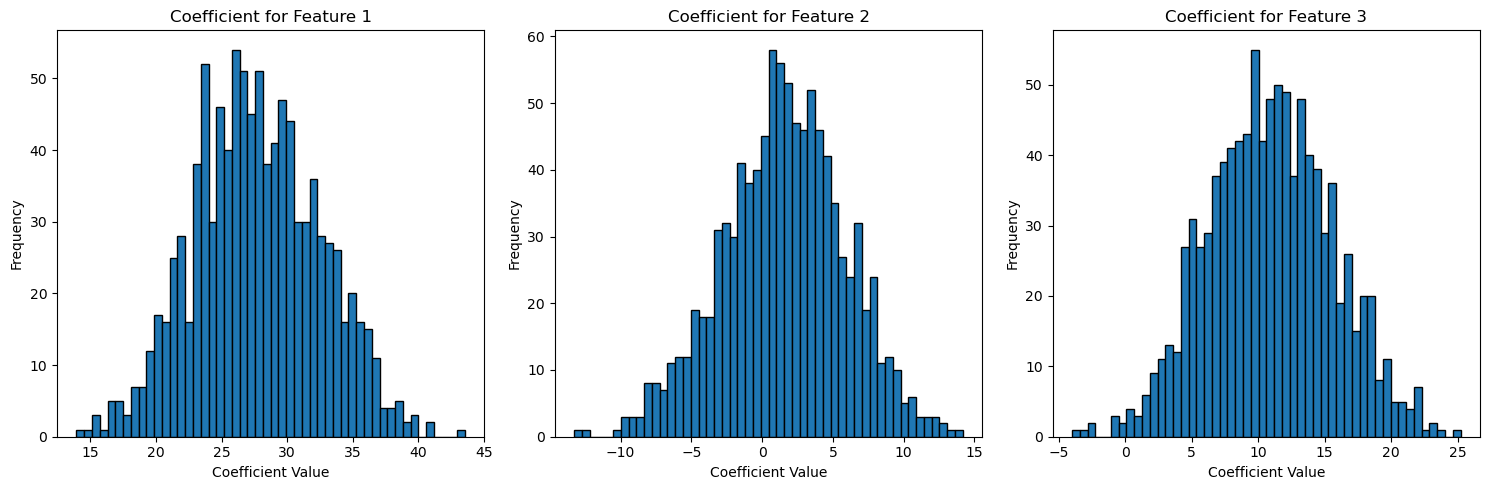

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

# Generate synthetic regression data
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

# Initialize the Ridge model
r = Ridge()

# Bootstrap resampling
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = int(0.5 * len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size, replace=True)

# Pre-allocate space for the coefficients
coefs_r = np.ones((n_bootstraps, 3))

# Perform bootstrap resampling
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    r.fit(subsample_X, subsample_y)
    coefs_r[i, :] = r.coef_

# Display the results
print(f'Bootstrap estimated coefficients (first few samples):\n{coefs_r[:10, :]}')

# Plot histogram of bootstrap coefficients for each feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for j in range(3):
    axes[j].hist(coefs_r[:, j], bins=50, edgecolor='k')
    axes[j].set_title(f'Coefficient for Feature {j+1}')
    axes[j].set_xlabel('Coefficient Value')
    axes[j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


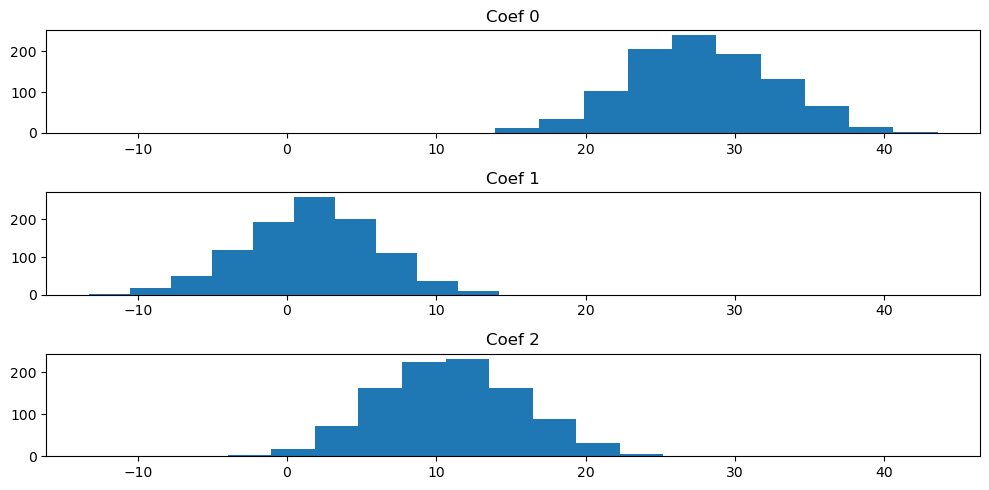

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
 
ax1 = plt.subplot(311, title ='Coef 0')
ax1.hist(coefs_r[:,0])
 
ax2 = plt.subplot(312,sharex=ax1, title ='Coef 1')
ax2.hist(coefs_r[:,1])
 
ax3 = plt.subplot(313,sharex=ax1, title ='Coef 2')
ax3.hist(coefs_r[:,2])
plt.tight_layout()

In [16]:
np.var(coefs, axis=0)

array([244.16465625, 242.62144817, 433.01880008])

In [18]:
np.var(coefs_r, axis=0) 

array([22.99276883, 18.76004085, 22.00327284])